IMPORTAMOS LIBRERIAS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers

IMPORTAMOS DATASET

In [4]:
url='https://raw.githubusercontent.com/nachxnx/TP-CICLO-SOLAR/main/Sunspots.csv'

                N
Date             
1749-01-31   96.7
1749-02-28  104.3
1749-03-31  116.7
1749-04-30   92.8
1749-05-31  141.7


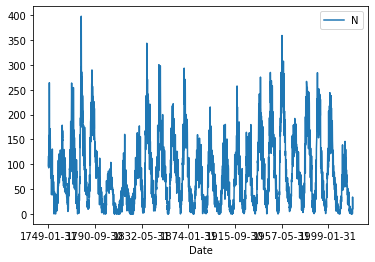

In [5]:
df = pd.read_csv(url,names=['Date','N'],skiprows=1)
df=df.set_index('Date')
print(df.head())
df.plot()

In [6]:
df.head()

,N
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


DIMENSION

In [7]:
df.shape

(3265, 1)

GRAFICAMOS

Text(0, 0.5, 'Monthly Mean Total Sunspot Number')

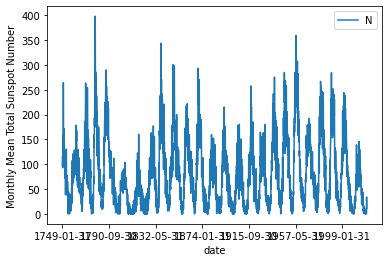

In [8]:
df.plot()
plt.xlabel('date')
plt.ylabel('Monthly Mean Total Sunspot Number')

MAXIMOS Y MINIMOS ANALIZADOS

In [9]:
print('Min', np.min(df))
print('Max', np.max(df))

Min N    0.0
dtype: float64
Max N    398.2
dtype: float64


VERIFICAMOS SI EXISTE UN VALOR FALTANTE

In [10]:
df.isnull().sum()

N    0
dtype: int64

ESCALAMOS

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
dataset = df.astype('float32')

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

In [14]:
print(dataset_scaled[:10])

[[0.24284278]
 [0.26192868]
 [0.2930688 ]
 [0.23304872]
 [0.35585132]
 [0.34957308]
 [0.39678553]
 [0.27749875]
 [0.31767955]
 [0.31592166]]


GENRAMOS LOS DATOS EN SERIES DE TIEMPORALES

In [15]:
X_data = dataset_scaled[:-1]
Y_data = dataset_scaled[1:]

In [16]:
Y_data

array([[0.26192868],
       [0.2930688 ],
       [0.23304872],
       ...,
       [0.08538423],
       [0.05474636],
       [0.02611753]], dtype=float32)

In [17]:
from sklearn.model_selection import train_test_split

SEPARAMOS LOS DATOS DE ENTRENAMIENTO Y PRUEBA

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2, shuffle=False)

In [19]:
X_train.shape

(2611, 1)

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
print('La dimensión del conjunto de entrenamiento (entrada) es:', X_train.shape)
print('La dimensión del conjunto de entrenamiento (salida)  es:', y_train.shape)
print('La dimensión del conjunto de prueba (entrada) es:       ', X_test.shape)
print('La dimensión del conjunto de prueba (salida) es:        ', y_test.shape)

La dimensión del conjunto de entrenamiento (entrada) es: (2611, 1, 1)
La dimensión del conjunto de entrenamiento (salida)  es: (2611, 1)
La dimensión del conjunto de prueba (entrada) es:        (653, 1, 1)
La dimensión del conjunto de prueba (salida) es:         (653, 1)


GENERAMOS EL MODELO

In [23]:
from keras.layers import Input, concatenate, Dense
from keras.models import Model

model_in= Input(shape=(1,1),dtype='float32',batch_size=1,name='main_input')
model_a=LSTM(4, batch_input_shape=(1,1,1),stateful=True)(model_in)
model_b=LSTM(10, batch_input_shape=(1,1,1),stateful=True)(model_in)
merges=concatenate([model_a,model_b])
x=Dense(1)(merges)
model=Model(inputs=model_in,outputs=x)

#model = Sequential()
#model.add(LSTM(4, batch_input_shape=(1, 1, 1), stateful=True))
#model.add(Dense(1))

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_input (InputLayer)        [(1, 1, 1)]          0           []                               
                                                                                                  
 lstm_1 (LSTM)                  (1, 4)               96          ['main_input[0][0]']             
                                                                                                  
 lstm_2 (LSTM)                  (1, 10)              480         ['main_input[0][0]']             
                                                                                                  
 concatenate (Concatenate)      (1, 14)              0           ['lstm_1[0][0]',                 
                                                                  'lstm_2[0][0]']             

COMPILACION Y ENTRENAMIENTO

In [24]:
model.compile(loss='mean_squared_error', optimizer='adam')

Epoch 1/100
2349/2349 - 9s - loss: 0.0071 - val_loss: 0.0163 - 9s/epoch - 4ms/step
Epoch 2/100
2349/2349 - 5s - loss: 0.0051 - val_loss: 0.0123 - 5s/epoch - 2ms/step
Epoch 3/100
2349/2349 - 5s - loss: 0.0047 - val_loss: 0.0105 - 5s/epoch - 2ms/step
Epoch 4/100
2349/2349 - 5s - loss: 0.0045 - val_loss: 0.0098 - 5s/epoch - 2ms/step
Epoch 5/100
2349/2349 - 5s - loss: 0.0045 - val_loss: 0.0093 - 5s/epoch - 2ms/step
Epoch 6/100
2349/2349 - 5s - loss: 0.0044 - val_loss: 0.0090 - 5s/epoch - 2ms/step
Epoch 7/100
2349/2349 - 5s - loss: 0.0044 - val_loss: 0.0089 - 5s/epoch - 2ms/step
Epoch 8/100
2349/2349 - 5s - loss: 0.0044 - val_loss: 0.0087 - 5s/epoch - 2ms/step
Epoch 9/100
2349/2349 - 5s - loss: 0.0044 - val_loss: 0.0086 - 5s/epoch - 2ms/step
Epoch 10/100
2349/2349 - 5s - loss: 0.0044 - val_loss: 0.0085 - 5s/epoch - 2ms/step
Epoch 11/100
2349/2349 - 5s - loss: 0.0044 - val_loss: 0.0085 - 5s/epoch - 2ms/step
Epoch 12/100
2349/2349 - 5s - loss: 0.0044 - val_loss: 0.0084 - 5s/epoch - 2ms/step
E

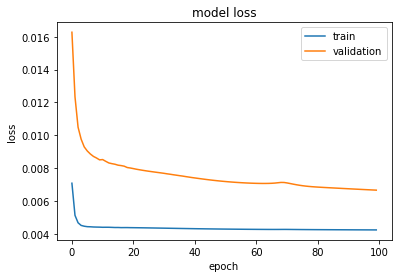

In [25]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2, shuffle=False, validation_split=0.1)
model.summary()
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

EVALUAMOS EL MODELO

In [26]:
model.reset_states()
trainPredict = model.predict(X_train, batch_size=1)
trainPredict = scaler.inverse_transform(trainPredict)
y_pred_train = scaler.inverse_transform(y_train)

In [27]:
model.reset_states()
testPredict = model.predict(X_test, batch_size=1)
testPredict = scaler.inverse_transform(testPredict)
y_pred_test = scaler.inverse_transform(y_test)

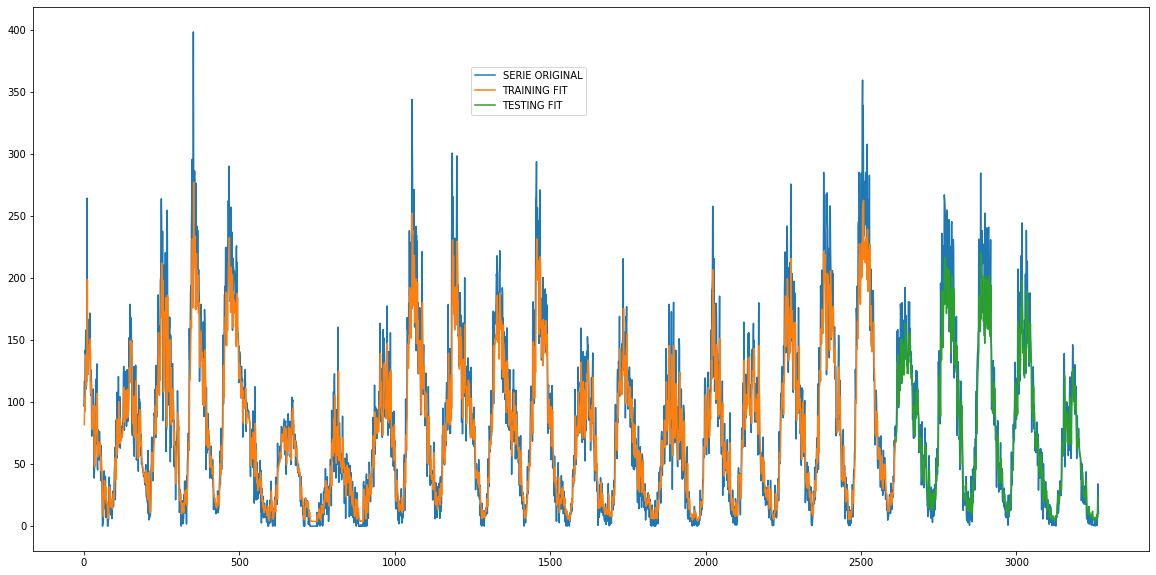

In [28]:
trainPredictPlot = np.empty_like(dataset_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict
testPredictPlot = np.empty_like(dataset_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+1:len(dataset_scaled)+1, :] = testPredict
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['SERIE ORIGINAL','TRAINING FIT','TESTING FIT'], bbox_to_anchor=(0.5, 0.9))
plt.show()

Prediccion


In [35]:
newwX=dataset_scaled[len(dataset_scaled)-134:]

In [36]:
model.reset_states()
Predict = model.predict(newwX, batch_size=1)
Predict = scaler.inverse_transform(Predict)

In [37]:
ejex=np.arange(len(newwX)-3,len(newwX)+len(Predict)-3)
len(ejex)

134

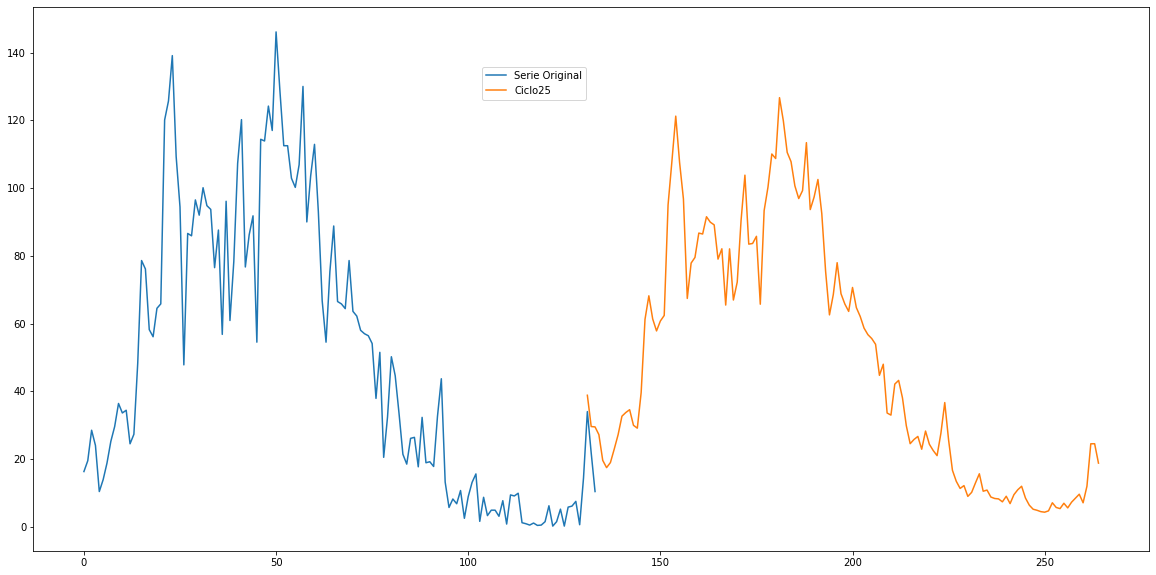

In [38]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(newwX))
plt.plot(ejex,Predict)
plt.legend(['Serie Original','Ciclo25'], bbox_to_anchor=(0.5, 0.9))
plt.show()